In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
import pandas as pd

data=pd.read_csv('Social_Network_Ads.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scl=StandardScaler()

In [8]:
da=scl.fit_transform(data[['Age', 'EstimatedSalary']])

In [9]:
da

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [10]:
X=da

In [11]:
Y=data.iloc[:,4].values

In [12]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [13]:
model=LogisticRegression()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [16]:
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred=model.predict(x_test)

In [19]:
cm=confusion_matrix(y_test,y_pred)
cm
import numpy as np

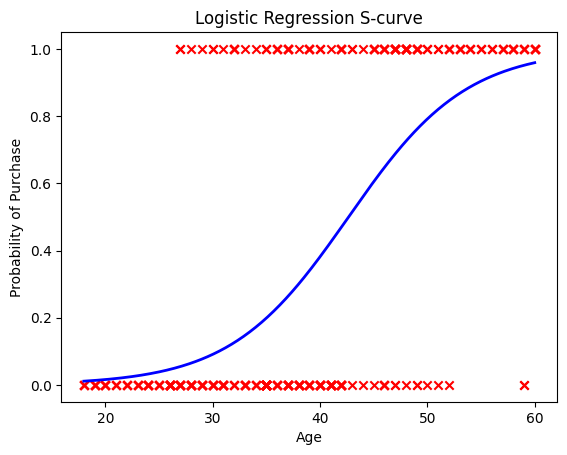

In [20]:

X = data[['Age']].values
y = data['Purchased'].values

# Scaling the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training the logistic regression model
classifier = LogisticRegression()
classifier.fit(X_scaled, y)

# Creating a range of values for Age to plot the S-curve
X_test = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)

# Predicting probabilities
y_prob = classifier.predict_proba(X_test_scaled)[:, 1]

# Plotting the S-shaped curve
plt.plot(X_test, y_prob, color='blue', linewidth=2)
plt.scatter(X, y, color='red', marker='x')
plt.title('Logistic Regression S-curve')
plt.xlabel('Age')
plt.ylabel('Probability of Purchase')
plt.show()

x_train,y_train,y_test,y_test,y_pred

In [106]:
x_train.shape

(280, 2)

In [107]:
y_train.shape

(280,)

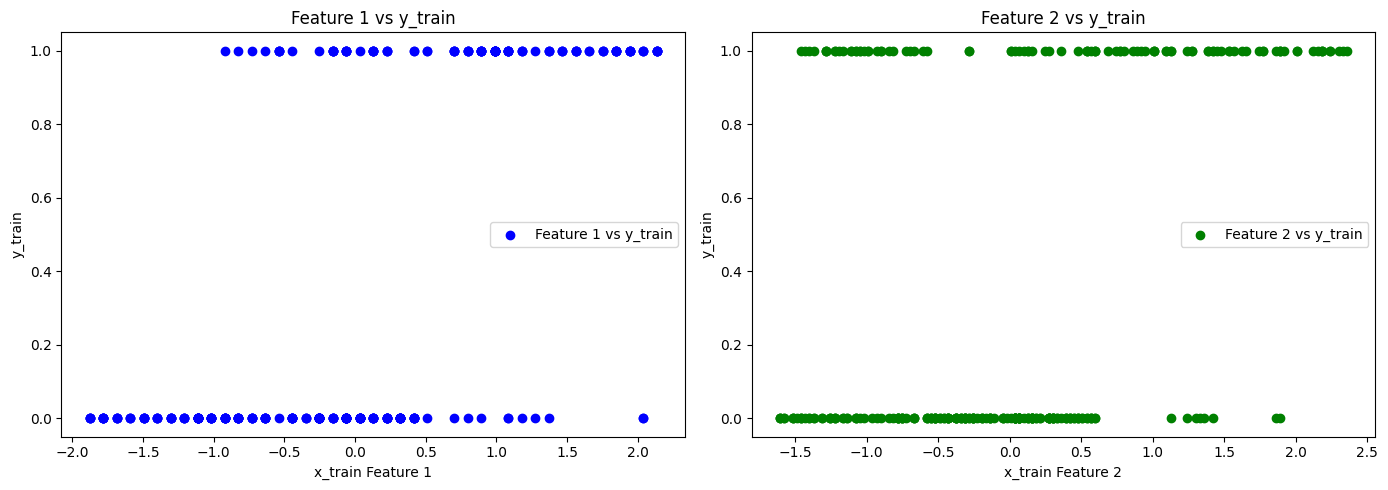

In [108]:
import matplotlib.pyplot as plt

# Extract both features from x_train
x_feature_1 = x_train[:, 0]
x_feature_2 = x_train[:, 1]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot for the first feature
axes[0].scatter(x_feature_1, y_train, color='blue', marker='o', label='Feature 1 vs y_train')
axes[0].set_xlabel('x_train Feature 1')
axes[0].set_ylabel('y_train')
axes[0].set_title('Feature 1 vs y_train')
axes[0].legend()

# Scatter plot for the second feature
axes[1].scatter(x_feature_2, y_train, color='green', marker='o', label='Feature 2 vs y_train')
axes[1].set_xlabel('x_train Feature 2')
axes[1].set_ylabel('y_train')
axes[1].set_title('Feature 2 vs y_train')
axes[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


ValueError: x and y must be the same size

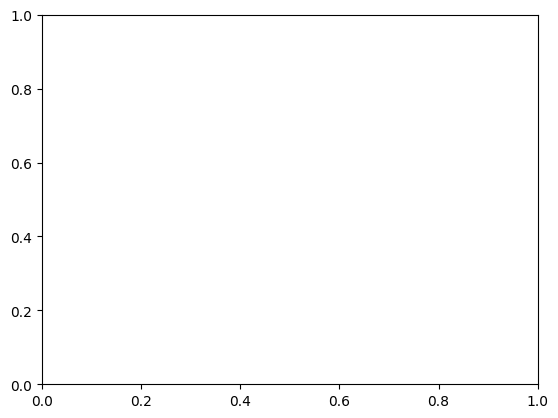

In [87]:
plt.scatter(x_train, y_train, color='blue', marker='o', label='Train data')


In [110]:
y_prob=model.predict_proba(x_test)

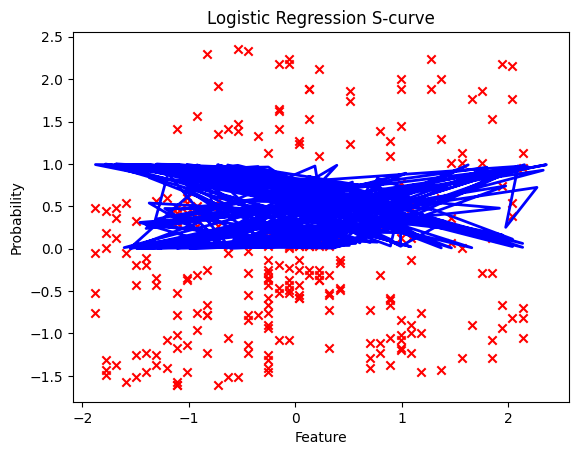

In [111]:


 
plt.plot(x_test, y_prob, color='blue', linewidth=2)
plt.scatter(x_feature_1, x_feature_2, color='red', marker='x')
plt.title('Logistic Regression S-curve')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.show()

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        78
           1       0.84      0.64      0.73        42

    accuracy                           0.83       120
   macro avg       0.84      0.79      0.80       120
weighted avg       0.83      0.83      0.83       120



In [37]:
model.score(x_train,y_train)

0.8464285714285714

In [38]:
model.score(x_test,y_test)

0.8333333333333334

<AxesSubplot: >

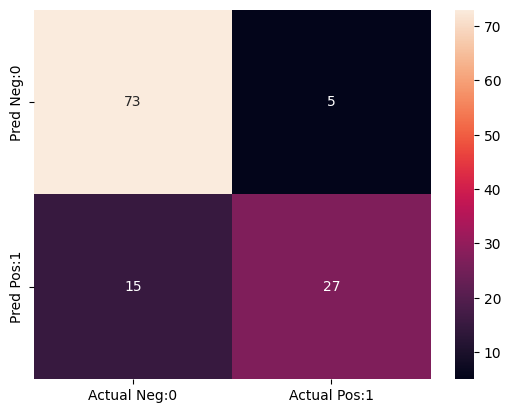

In [41]:
cm_mat=pd.DataFrame(data=cm,columns=['Actual Neg:0','Actual Pos:1'],index=['Pred Neg:0','Pred Pos:1'])
sns.heatmap(data=cm_mat,annot=True)

In [44]:
df=sns.load_dataset('iris')

In [50]:
XX=df.iloc[:,:-1].values

In [51]:
XX

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
lbl=LabelEncoder()

In [54]:
dats=lbl.fit_transform(df['species'])

In [56]:
YY=dats

In [57]:
XX

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [58]:
mod=LogisticRegression()

In [59]:
x_train,x_test,y_train,y_test=train_test_split(XX,YY,test_size=0.3,random_state=32)

In [60]:
mod.fit(x_train,y_train)

C:\Users\user\anaconda3\envs\tf-2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_pred=mod.predict(x_test)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [65]:
cm=confusion_matrix(y_test,y_pred)

In [66]:
cm

array([[19,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 14]], dtype=int64)

In [67]:
print(mod.score(x_train,y_train))

0.9523809523809523


In [68]:
print(mod.score(x_test,y_test))

1.0
